In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("CleanedData/Cleaned_dataset.csv")

In [3]:
data.head()

,Unnamed: 0,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,0,62.0,70.0,1.025,3.0,0.0,0.0,1.0,0.0,0.0,...,39.0,7900.0,3.9,1.0,1.0,0.0,1,0,0,1
1,1,54.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,...,41.0,7900.0,4.8,0.0,1.0,0.0,1,0,0,1
2,2,47.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,...,41.0,7900.0,4.8,1.0,0.0,0.0,0,0,0,1
3,3,43.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,7200.0,5.5,0.0,0.0,0.0,1,0,0,0
4,4,42.0,100.0,1.015,4.0,0.0,0.0,1.0,0.0,1.0,...,39.0,8300.0,4.6,1.0,0.0,0.0,0,0,0,1


In [4]:
data.columns

Index(['Unnamed: 0', 'Age (years)', 'Blood Pressure (mm/Hg)',
       'Specific Gravity', 'Albumin', 'Sugar', 'Red Blood Cells', 'Pus Cells',
       'Pus Cell Clumps', 'Bacteria', 'Blood Glucose Random (mgs/dL)',
       'Blood Urea (mgs/dL)', 'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)',
       'Potassium (mEq/L)', 'Hemoglobin (gms)', 'Packed Cell Volume',
       'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)',
       'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
       'Appetite', 'Pedal Edema', 'Anemia', 'Chronic Kidney Disease'],
      dtype='object')

In [5]:
data.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,62.0,70.0,1.025,3.0,0.0,0.0,1.0,0.0,0.0,122.0,...,39.0,7900.0,3.9,1.0,1.0,0.0,1,0,0,1
1,54.0,70.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,233.0,...,41.0,7900.0,4.8,0.0,1.0,0.0,1,0,0,1
2,47.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,41.0,7900.0,4.8,1.0,0.0,0.0,0,0,0,1
3,43.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,108.0,...,43.0,7200.0,5.5,0.0,0.0,0.0,1,0,0,0
4,42.0,100.0,1.015,4.0,0.0,0.0,1.0,0.0,1.0,124.0,...,39.0,8300.0,4.6,1.0,0.0,0.0,0,0,0,1


### **Important Features Selections**

In [7]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

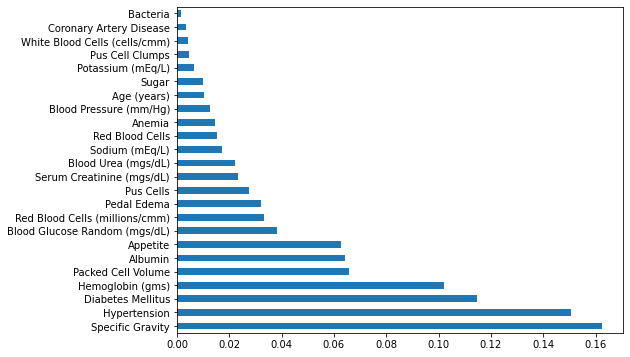

In [8]:
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

In [9]:
ranked_features.nlargest(8).index

Index(['Specific Gravity', 'Hypertension', 'Diabetes Mellitus',
       'Hemoglobin (gms)', 'Packed Cell Volume', 'Albumin', 'Appetite',
       'Blood Glucose Random (mgs/dL)'],
      dtype='object')

In [10]:
X = data[['Diabetes Mellitus', 'Specific Gravity', 'Hypertension',
       'Hemoglobin (gms)', 'Albumin', 'Packed Cell Volume', 'Appetite',
       'Red Blood Cells (millions/cmm)']]
X.head()

,Diabetes Mellitus,Specific Gravity,Hypertension,Hemoglobin (gms),Albumin,Packed Cell Volume,Appetite,Red Blood Cells (millions/cmm)
0,1.0,1.025,1.0,12.6,3.0,39.0,1,3.9
1,1.0,1.020,0.0,11.7,0.0,41.0,1,4.8
2,0.0,1.020,1.0,12.1,0.0,41.0,0,4.8
3,0.0,1.025,0.0,17.8,0.0,43.0,1,5.5
4,0.0,1.015,1.0,11.1,4.0,39.0,0,4.6


In [11]:
X.tail()

,Diabetes Mellitus,Specific Gravity,Hypertension,Hemoglobin (gms),Albumin,Packed Cell Volume,Appetite,Red Blood Cells (millions/cmm)
275,1.0,1.010,1.0,9.8,1.0,28.0,1,3.2
276,1.0,1.020,1.0,6.0,0.0,17.0,1,4.8
277,0.0,1.025,0.0,14.3,0.0,41.0,1,5.0
278,0.0,1.020,0.0,13.6,0.0,44.0,1,6.4
279,0.0,1.010,0.0,13.9,0.0,52.0,1,4.8


In [12]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Chronic Kidney Disease, dtype: int64

##### ***Train Test Split***

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=30)

In [14]:
X_train.shape

(196, 8)

In [15]:
X_test.shape

(84, 8)

In [16]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score

#### **1. Random Forest Tree**

In [28]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Prediction from test data:
y_pred = RandomForest.predict(X_test)

# Accuracy:
print('Accuracy:', accuracy_score(y_test,y_pred))


Accuracy: 0.9880952380952381


#### **2. Gradient Boosting**

In [29]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Prediction from test data:
y_pred = GradientBoost.predict(X_test)

# Accuracy:
print('Accuracy:', accuracy_score(y_test,y_pred))


Accuracy: 0.9761904761904762


#### **3. Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train,y_train)
# Prediction from test data:
y_pred = DecisionTree.predict(X_test)
# Accuracy:
print('Accuracy:', accuracy_score(y_test,y_pred))

Accuracy: 0.9761904761904762


#### **4. ANN-Model**

In [20]:
import tensorflow as tf
import keras as k
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [21]:
model = Sequential()

#first layer
model.add(Dense(256,input_dim= len(X.columns),kernel_initializer= k.initializers.random_normal(seed= 13),activation= 'relu'))

#second layer
model.add(Dense (1, activation = 'hard_sigmoid'))

In [22]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
#train the model

ANN_model = model.fit(X_train, y_train, epochs = 200, batch_size = X_train.shape[0])

Epoch 1/200
1/1 [==============================] - 0s 21ms/step - loss: 0.1115 - accuracy: 0.9490
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 0.1110 - accuracy: 0.9490
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 0.1107 - accuracy: 0.9490
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 0.1106 - accuracy: 0.9490
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 0.1102 - accuracy: 0.9490
Epoch 6/200
1/1 [==============================] - 0s 8ms/step - loss: 0.1102 - accuracy: 0.9490
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 0.1103 - accuracy: 0.9541
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 0.1096 - accuracy: 0.9490
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 0.1097 - accuracy: 0.9490
Epoch 10/200
1/1 [==============================] - 0s 20ms/step - loss: 0.1099 - accuracy: 0.9541
Epoch 11/200
1/1 [====

In [32]:
print(ANN_model.history['accuracy'])

[0.9489796161651611, 0.9489796161651611, 0.9489796161651611, 0.9489796161651611, 0.9489796161651611, 0.9489796161651611, 0.954081654548645, 0.9489796161651611, 0.9489796161651611, 0.954081654548645, 0.9489796161651611, 0.9489796161651611, 0.954081654548645, 0.9489796161651611, 0.9489796161651611, 0.9591836929321289, 0.9489796161651611, 0.9489796161651611, 0.9591836929321289, 0.954081654548645, 0.9489796161651611, 0.9489796161651611, 0.954081654548645, 0.9489796161651611, 0.954081654548645, 0.9489796161651611, 0.9489796161651611, 0.954081654548645, 0.9489796161651611, 0.954081654548645, 0.9489796161651611, 0.9489796161651611, 0.9591836929321289, 0.9489796161651611, 0.9591836929321289, 0.9489796161651611, 0.9591836929321289, 0.9489796161651611, 0.9591836929321289, 0.9489796161651611, 0.9591836929321289, 0.9489796161651611, 0.9591836929321289, 0.954081654548645, 0.9591836929321289, 0.9591836929321289, 0.9489796161651611, 0.9591836929321289, 0.9591836929321289, 0.954081654548645, 0.9591836

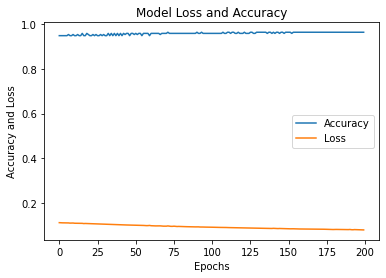

In [33]:
#visualie model loss and accuracy

plt.plot(ANN_model.history['accuracy'],label='Accuracy')
plt.plot(ANN_model.history['loss'],label='Loss')
plt.title('Model Loss and Accuracy')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')   
plt.legend();

In [34]:
print("shape of training data: ",X_train.shape)
print("shape of test data: ",X_test.shape)

shape of training data:  (196, 8)
shape of test data:  (84, 8)


In [35]:
#show actual and predicted value
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]

print('Original:  {0}'.format(",".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(",".join(str(x) for x in pred)))

Original:  1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,0,1,1,0
Predicted: 0,1,0,1,1,1,1,1,0,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,1,0,1,1,0


In [36]:
import pickle

In [37]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Creating a pickle file for the classifier
filename = 'ckd_model.pkl'
pickle.dump(RandomForest, open(filename, 'wb'))